# Unsupervised_ML(K mean Clustring)

# Problem Statement:
- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [1]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# 1. Loading the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style #style.use('dark_background')
#style.use('dark_background')
plt.style.use('seaborn-dark')
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# To perform K-means clustering
from sklearn.cluster import KMeans

# 2. Importing Data set into Python

In [3]:
data = pd.read_csv("Iris.csv", index_col = 0)

In [4]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# 3. Data preprocessing

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.shape

(150, 5)

In [8]:
data.size

750

# 4. Exploratory Data Analysis

## To Find Data type and missing values in data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


- 1) There is no missing value present in the data set.
- 2) SepalLengthCm,SepalWidthCm, PetalLengthCm, and PetalWidthCm are of Float datatype where as Species are of object data type.

# Getting all the unique values in each Column of Data Frame.¶

In [10]:
data["SepalLengthCm"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [11]:
data["SepalWidthCm"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [12]:
data["PetalLengthCm"].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [13]:
data["PetalWidthCm"].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

# 5. Finding Missing values in data set if any

In [14]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- Here we observed that, there is no missing value present in the data

# Number of species present in the dataset

In [15]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
data.groupby(["Species"]).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


- We can see that there are no missing values in the dataset

# 6. Descriptive statistics of the Data

In [17]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- describe() Function Gives us Five number summary that is min, max, count, mean and Quartile.

# 7. Visualising Data

# Correlation.
- Correlation tells us the relationship between Numarical variables present in data.

In [18]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


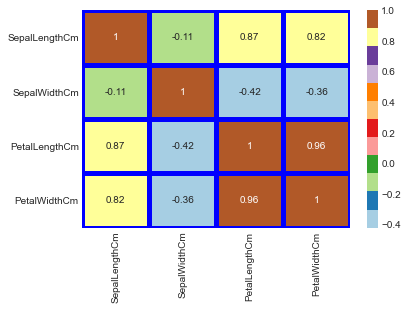

In [19]:
sns.heatmap(data.corr(), 
            cmap="Paired", 
            linecolor = "Blue" ,
            linewidth= 5 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

In [20]:
data.groupby(["Species"]).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


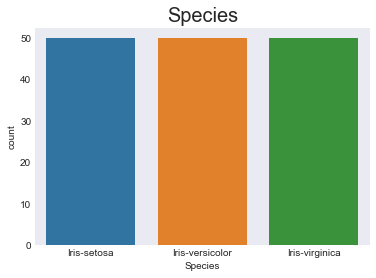

In [21]:
sns.countplot(x='Species',data=data)
plt.title('Species',fontsize=20)
plt.show()

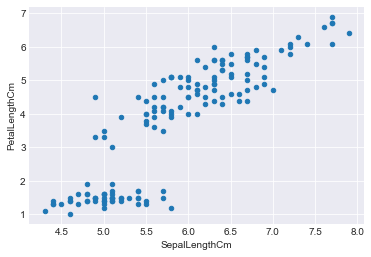

In [22]:
data.plot(kind ="scatter", 
          x ='SepalLengthCm', 
          y ='PetalLengthCm') 
plt.grid()

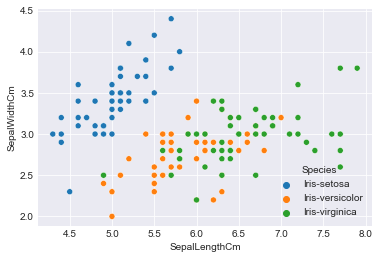

In [23]:
sns.scatterplot(x=data["SepalLengthCm"],
                y=data["SepalWidthCm"], 
                hue=data["Species"])
plt.grid()
plt.show()

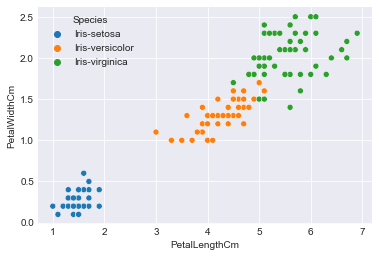

In [24]:
sns.scatterplot(x=data["PetalLengthCm"], 
                y=data["PetalWidthCm"], 
                hue=data["Species"])
plt.grid()
plt.show()

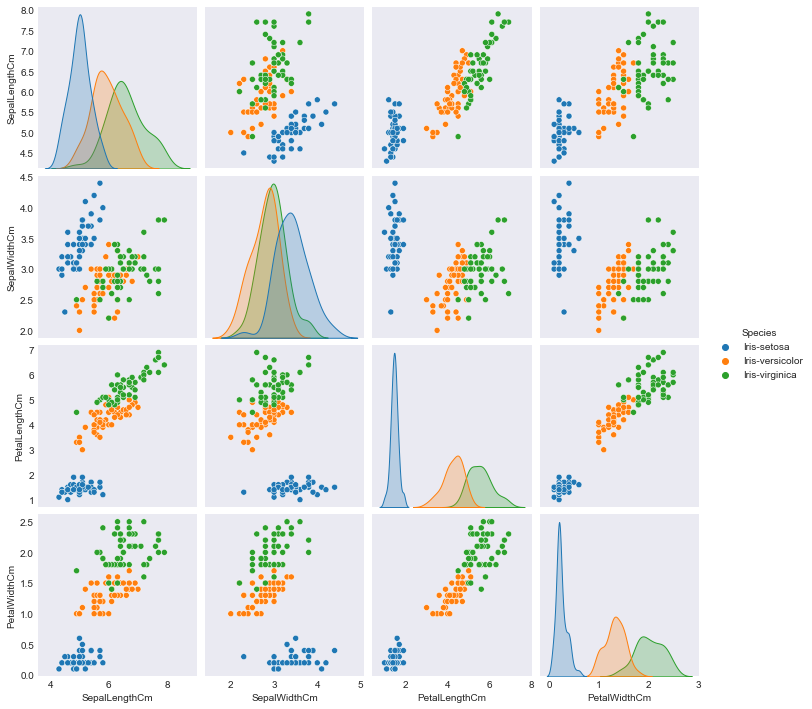

In [25]:
x = sns.pairplot(data, hue='Species')
plt.show()

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orange) and iris-virginica (green).

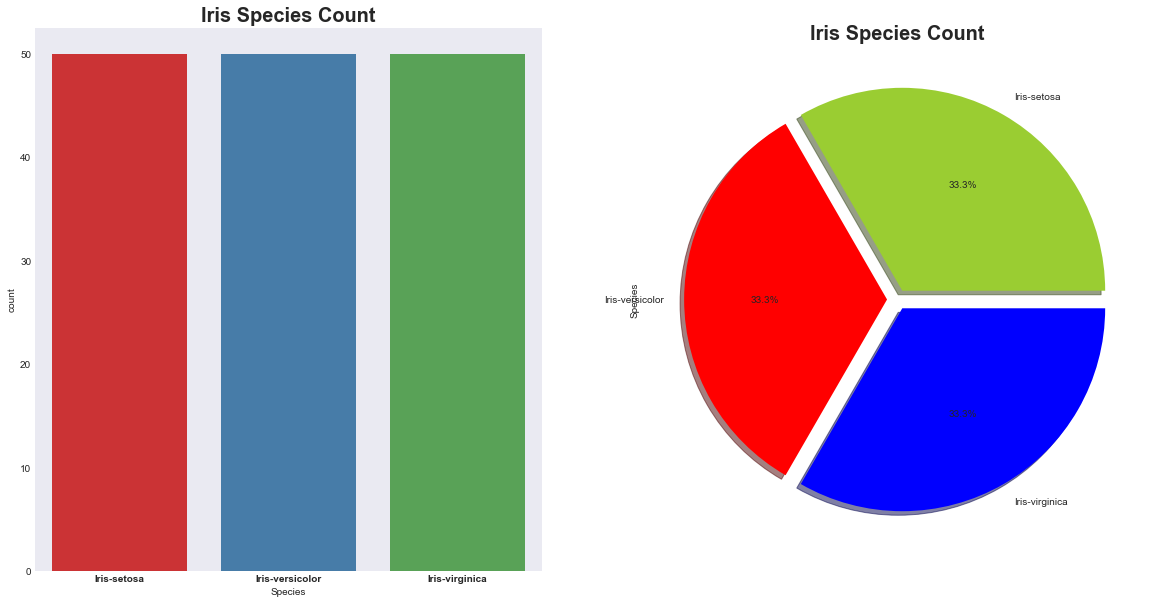

In [26]:
plt.figure(figsize=(20, 10))

color = ['yellowgreen', 'red','blue']
plt.subplot(1,2,1)
sns.countplot('Species',data=data, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.subplot(1,2,2)
data['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True, colors=color)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.show()

- Here the frequency of the observation is plotted.In this case we are plotting the frequency of the three species in the Iris Dataset.
- We can see that there are 50 samples each of all the Iris Species in the data set.

# Jointplot.

- Jointplot is seaborn library.
- It can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

<Figure size 1080x720 with 0 Axes>

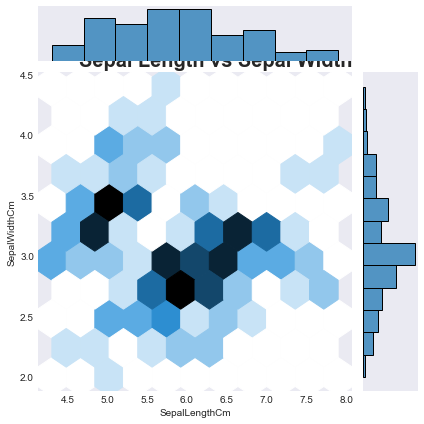

In [27]:
plt.figure(figsize=(15,10))
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=data, kind = "hex")
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=20, loc = "right" )
plt.show()

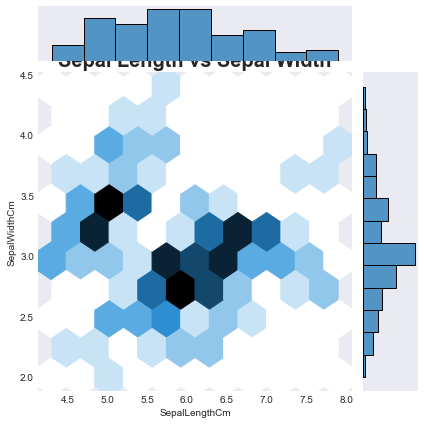

In [28]:
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',kind='hex',data=data)
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=20)
plt.show()

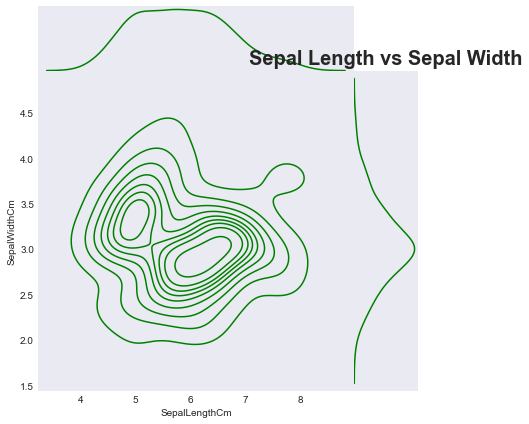

In [29]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=data, kind="kde",space=0,color='g')
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=20, loc = "center")
plt.show()

# visualize the data with a scatter plots based on Sepal and Petal width and length

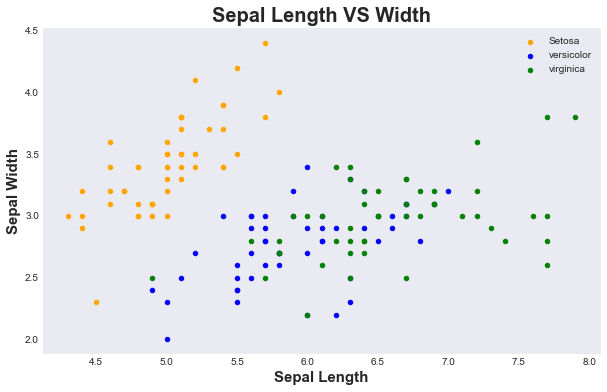

In [30]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length", fontweight="bold", size=15)
fig.set_ylabel("Sepal Width", fontweight="bold", size=15)
fig.set_title("Sepal Length VS Width", fontweight='bold',size=20)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

- We can clearly see that sepal characteristics differentiate setosa but not versicolor and virginica

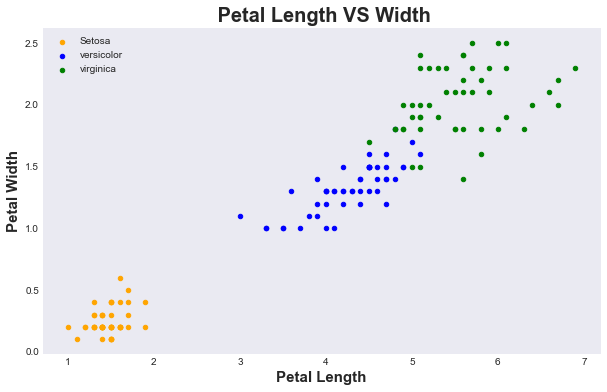

In [31]:
fig =data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length", fontweight="bold", size=15)
fig.set_ylabel("Petal Width", fontweight="bold", size=15)
fig.set_title(" Petal Length VS Width", fontweight="bold", size=20 )
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

- With Petal characteristics we can easily classify the species but there is a little thin line between the virginica and versicolor

# Visualising Probability Density Voilin Plot.
 - Violin Plot help us to see both the distribution of the data in terms of kernel density estimation and boxplot.

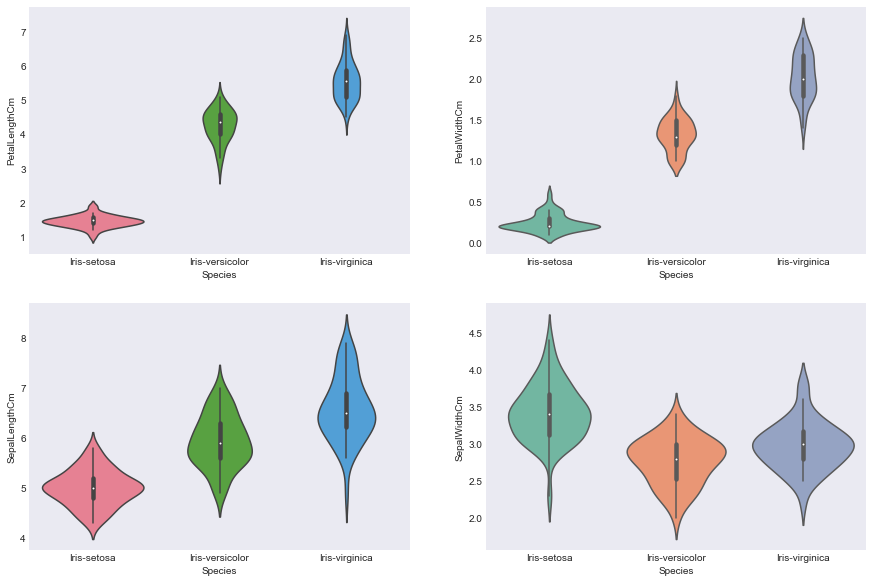

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data,palette='husl')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data, palette='Set2')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data,palette='husl')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data,palette='Set2')
plt.show()


- The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

# Heatmap

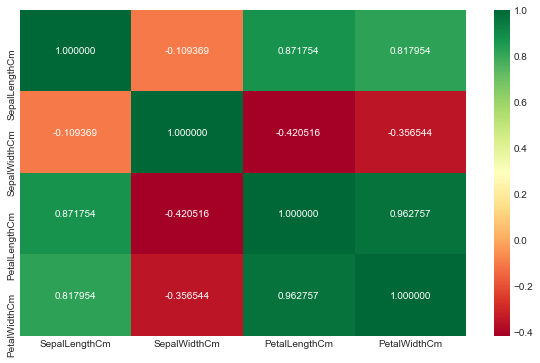

In [33]:
plt.figure(figsize=(10,6)) 
sns.heatmap(data.corr(),annot=True,fmt="f",cmap="RdYlGn")
plt.show()

In [34]:
data.drop('Species', axis =1, inplace = True)

In [35]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [36]:
feature = data.columns[0:]
for i in enumerate(feature):
    print(i)

(0, 'SepalLengthCm')
(1, 'SepalWidthCm')
(2, 'PetalLengthCm')
(3, 'PetalWidthCm')


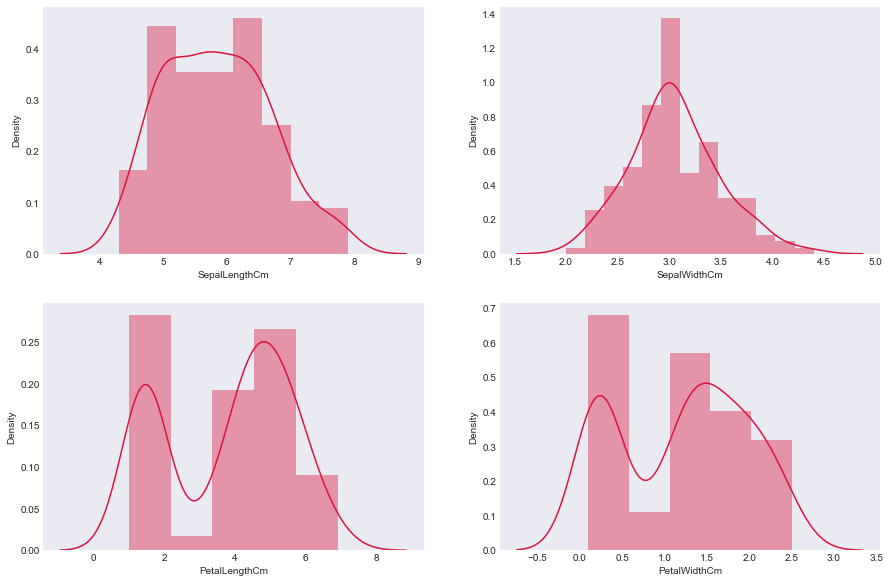

In [37]:
plt.figure(figsize = (15,10))
feature = data.columns[:]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(data[i[1]],color='crimson')

-  We can see that Sepal Length and Sepal Width columns are normally distributed.
-  Where Petal Length and Petal Width columns have skewness in the data.
-  We will use Petal_length and petal_width for cluster profiling

# 8. Outlier Treatment

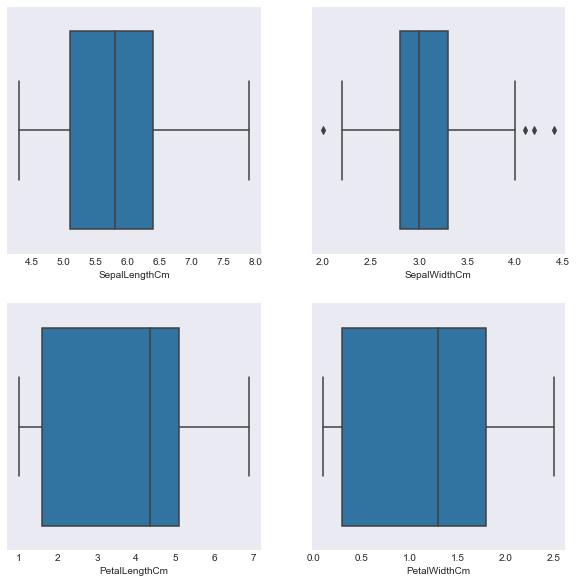

In [38]:
plt.figure(figsize = (10,10))
feature = data.columns[:]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(data[i[1]])

- Based on the above boxplot, we observed that there are outliers in the column "SepalWidthCm".

# To remove outliers from "SepalWidthCm"¶

In [39]:
q1 = data["SepalWidthCm"].quantile(0.25)
q3 = data["SepalWidthCm"].quantile(0.75)
IQR = q3 - q1
df = data[(data["SepalWidthCm"] >= q1-1.5*IQR) & (data["SepalWidthCm"] <= q3+1.5*IQR)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 4)

- After Treating outliers, We can see that the number of rows are reduced to 146 from 150


## Boxplot of SepalWidthCm

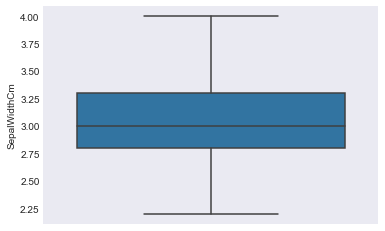

<Figure size 720x360 with 0 Axes>

In [40]:
sns.boxplot(y=df["SepalWidthCm"])
plt.figure(figsize=(10,5))
plt.show()

# Standardizing to avoid bias

In [41]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)

# K-Mean Clustering

## To find the optimal no. of cluster 

In [42]:
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,584.000000
1,2,218.934500
2,3,135.398152
3,4,110.671976
4,5,89.380638
5,6,78.207029
6,7,69.301700
7,8,60.200970
8,9,52.498627
9,10,46.591159


# Using the elbow method to find the optimal number of clusters

In [43]:
X = data.iloc[:, [0,1,2,3]].values # #Taking values except for "id" and "Species"
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

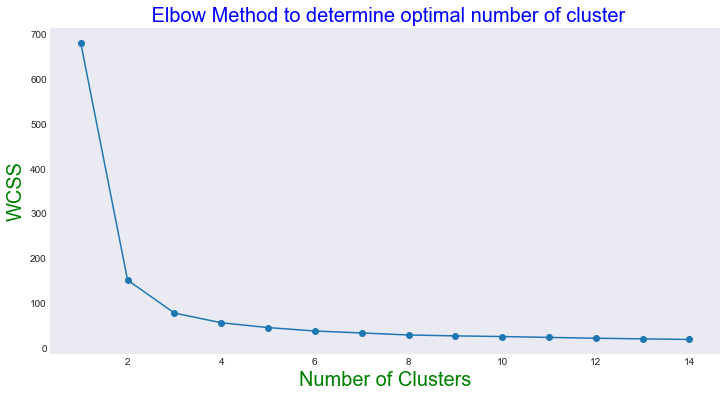

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title(' Elbow Method to determine optimal number of cluster', size = 20, color = "Blue")
plt.xlabel('Number of Clusters', size = 20, color = "Green")
plt.ylabel('WCSS', size = 20, color = "Green")
plt.show()

From the above elbow curve we can say that '3' is the optimal number of cluster.

Because:-

1) The elbow occurs in the optimum clusters.

2) This is when the within cluster sum of sqaures [WCSS] doesn't decrease significantly with every iteration.

3) Therefore the number of cluster will be 3

# Training the K-Means model on the dataset

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Creating object of the model and fitting it

In [46]:
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [47]:
K_Mean = data.copy()

In [48]:
K_Mean

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [49]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [50]:
K_Mean = pd.concat([K_Mean, label], axis =1)
K_Mean.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,NaN,NaN,NaN,NaN,1.0
1,5.1,3.5,1.4,0.2,1.0
2,4.9,3.0,1.4,0.2,1.0
3,4.7,3.2,1.3,0.2,1.0
4,4.6,3.1,1.5,0.2,1.0


In [51]:
K_Mean.label.value_counts()

0.0    62
1.0    50
2.0    38
Name: label, dtype: int64

- We can see that Cluster 0 is having 38 Data points
- Cluster 1 is having 50 data points
- Cluster 2 is having 62 data points

# Using the dendrogram to find the optimal number of clusters

# Hierarchical Clustering

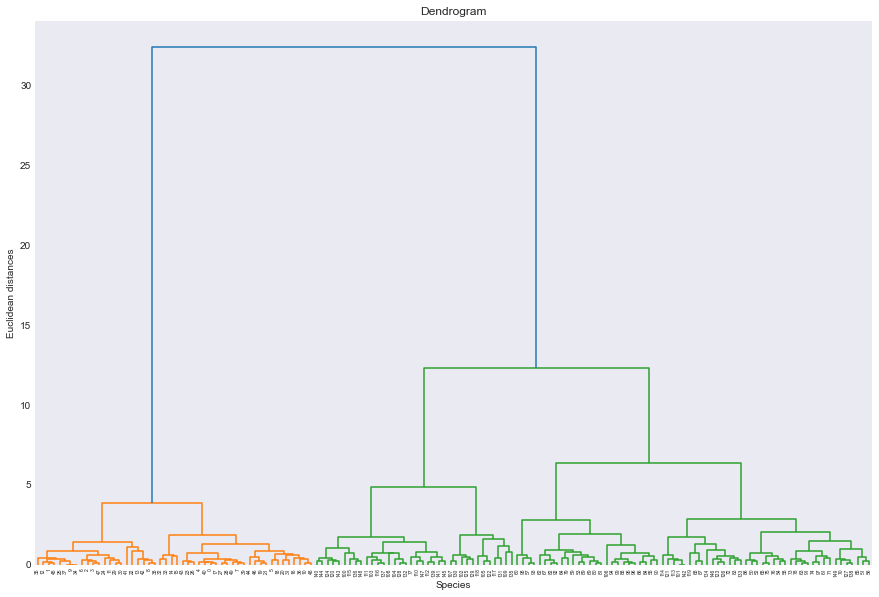

In [52]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchical Clustering model on the dataset

# AgglomerativeClustering

In [53]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters¶

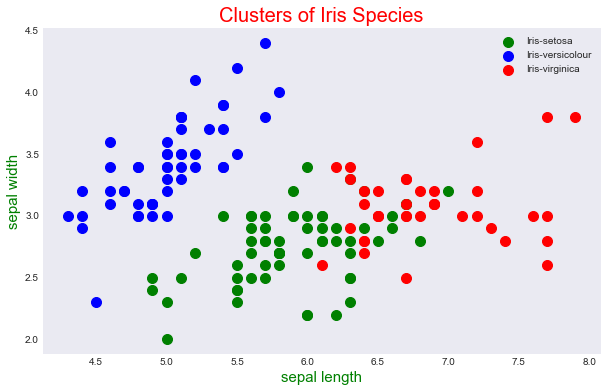

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'Green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'Red', label = 'Iris-virginica')

plt.title('Clusters of Iris Species', size = 20, color = "Red")
plt.xlabel('sepal length', size = 15, color = "Green")
plt.ylabel('sepal width', size = 15, color = "Green")
plt.legend()
plt.show()

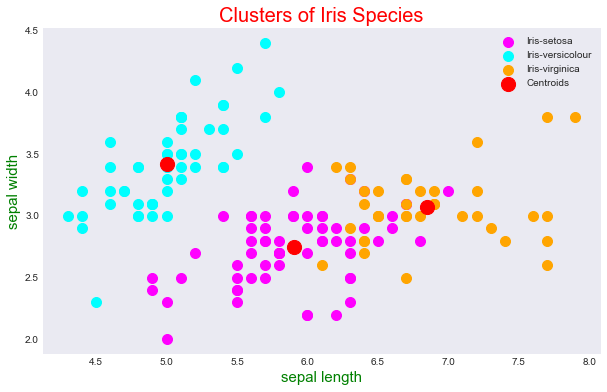

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters of Iris Species', size = 20, color = "Red")
plt.xlabel('sepal length', size = 15, color = "Green")
plt.ylabel('sepal width', size = 15, color = "Green")
plt.legend()
plt.show()

# Clsuter Profiling

<Figure size 1440x720 with 0 Axes>

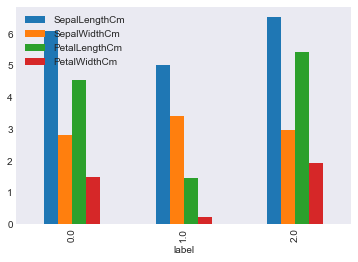

In [56]:
plt.figure(figsize=(20,10))
K_Mean.groupby('label').mean().plot(kind = 'bar')
plt.show()

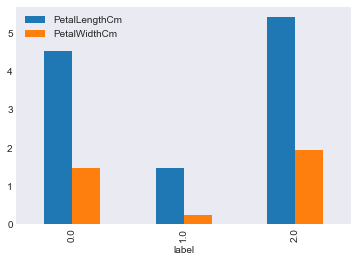

In [57]:
K_Mean.drop(['SepalLengthCm', 'SepalWidthCm'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

# Conclusion:-
- This is the optimum cluster.